**Module Paths**

In [1]:
import os

os.chdir("../../")

# Putting everything together

Train the model and validate it against the validation set.

Let's start by defining a few hyperparameters

In [2]:
batch_size = 64  # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2  # fraction of the training data to reserve for validation
num_epochs = 50  # number of epochs for training
num_classes = 50  # number of classes. Do not change this
dropout = 0.5  # dropout for our model
learning_rate = 0.01  # Learning rate for SGD (or Adam)
opt = "sgd"  # optimizer. 'sgd' or 'adam'
weight_decay = 0.01  # regularization. Increase this to combat overfitting
momentum = 0.9

## Import necessary components

In [3]:
from cnn.landmark_classification.src.data import get_data_loaders
from cnn.landmark_classification.src.train import optimize, one_epoch_test
from cnn.landmark_classification.src.optimizer import get_optimizer, get_loss
from cnn.landmark_classification.src.model import MyModel

## Training

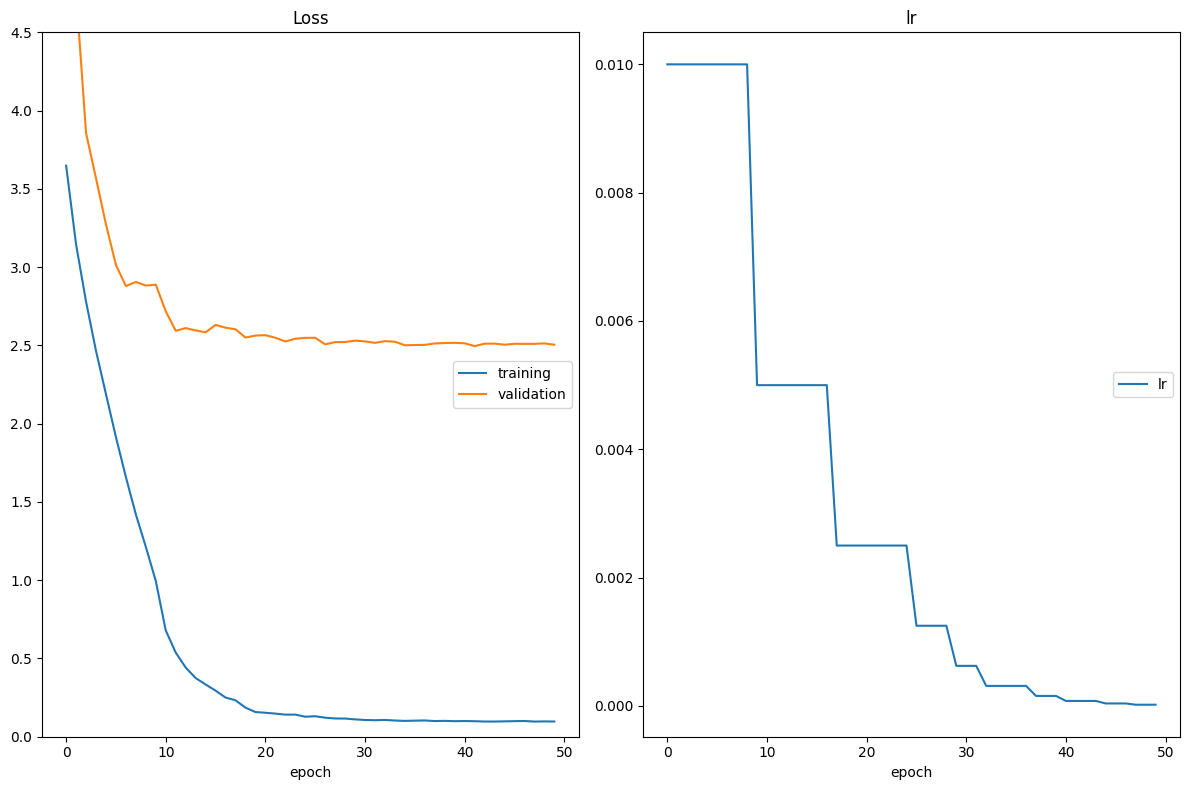

In [4]:
`# Set up data loaders using batch_size and valid_size defined above
data_loaders = get_data_loaders(batch_size=batch_size, valid_size=valid_size)

# Instantiate model with num_classes and dropout
model = MyModel(num_classes=num_classes, dropout=dropout)

# Get the optimizer with the specified model, learning rate, optimizer type, and weight decay
optimizer = get_optimizer(
    model,
    optimizer=opt,
    learning_rate=learning_rate,
    weight_decay=weight_decay,
    momentum=momentum,
)

# Get the loss function
loss = get_loss()

# Run the optimization process
optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/best_val_loss.pt",
    interactive_tracking=True,
)

In [5]:
import torch

model = MyModel(num_classes=num_classes, dropout=dropout)

# Load the weights from the checkpoint
model.load_state_dict(torch.load("checkpoints/best_val_loss.pt", weights_only=True))

# device
from utils.device import get_device

device = get_device()
model = model.to(device)

# Run test
one_epoch_test(data_loaders["test"], model, loss)

Test Loss: 2.421202
Test Accuracy: 40.72%


2.4212023429870606

## Improvement Attempt

The lack of further improvement suggests a potential issue of the model plateauing or hitting a local minimum.

Few steps to further improve the validation performance:
- lowering the initial learning rate slightly
- slightly increasing the weight decay
- reducing drop out slightly to 0.3

Also, 
- adding early stopping to avoid unnecessary training

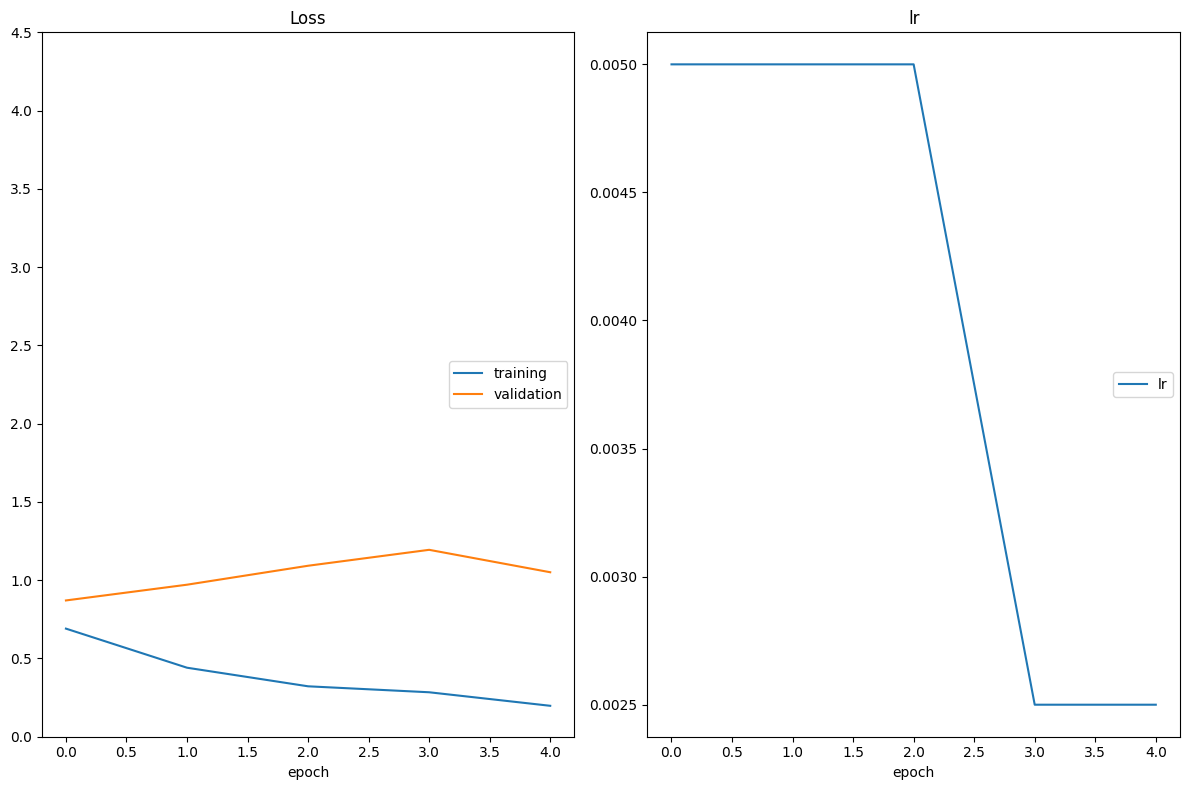

Epoch: 6 	Training Loss: 0.180982 	Validation Loss: 1.050364
No improvement for 5 epochs.
Early stopping triggered after 5 epochs of no improvement.


In [6]:
from cnn.landmark_classification.src.train import optimize

# Define the updated dropout rate
new_dropout = 0.3
num_epochs = 20
learning_rate = 0.005
weight_decay = 0.02

model = MyModel(num_classes=num_classes, dropout=new_dropout)
model.load_state_dict(torch.load("checkpoints/best_val_loss.pt", weights_only=True))

optimizer = get_optimizer(
    model,
    optimizer=opt,
    learning_rate=learning_rate,
    weight_decay=weight_decay,
    momentum=momentum,
)

# Continue training with the new dropout rate (added a early stopping condition in the backend)
optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,  # Set the number of additional epochs
    save_path="checkpoints/best_val_loss_updated.pt",  # New checkpoint to save further improvements
    interactive_tracking=True,
)

In [7]:
model = MyModel(num_classes=num_classes, dropout=dropout)

# Load the weights from the checkpoint
model.load_state_dict(
    torch.load("checkpoints/best_val_loss_updated.pt", weights_only=True)
)

# device
from utils.device import get_device

device = get_device()
model = model.to(device)

# Run test
one_epoch_test(data_loaders["test"], model, loss)

Test Loss: 2.472513
Test Accuracy: 37.36%


2.4725128868103026

## Improvement Attempt

Using enhanced model with more dropout after each convolution layer

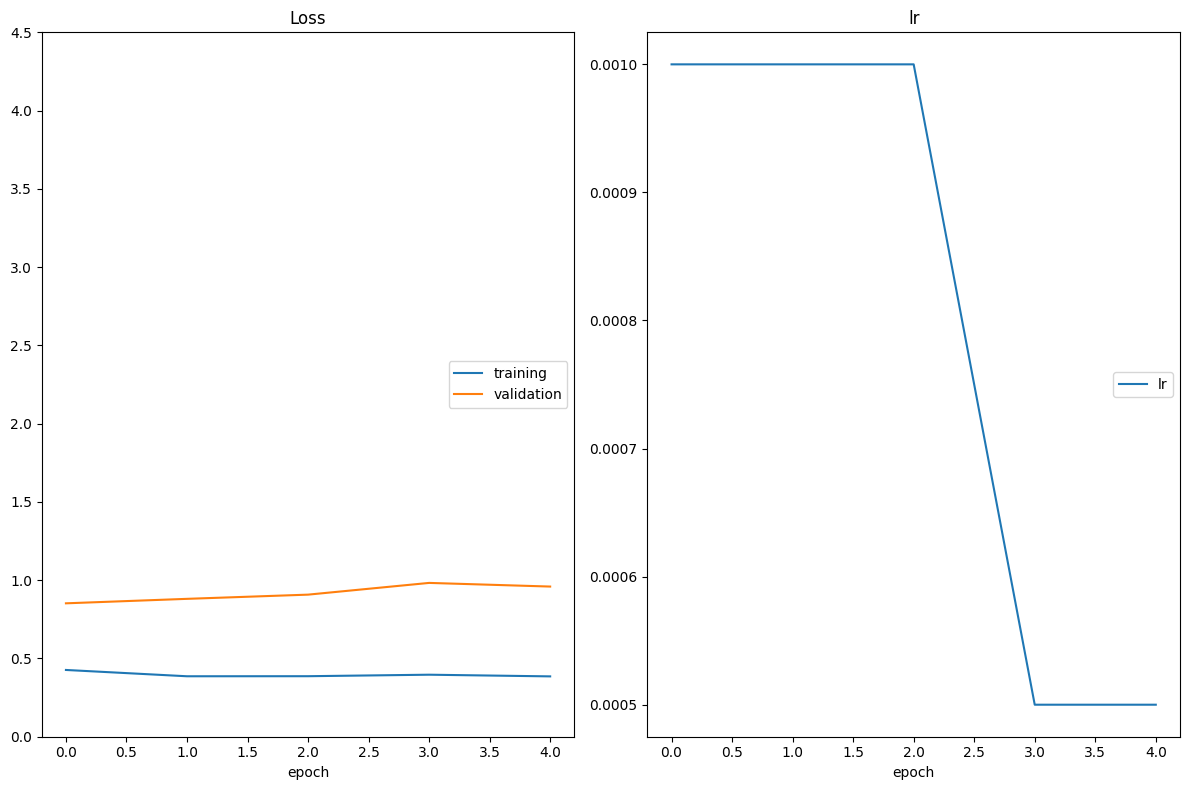

Epoch: 6 	Training Loss: 0.384546 	Validation Loss: 0.960302
No improvement for 5 epochs.
Early stopping triggered after 5 epochs of no improvement.


In [8]:
from cnn.landmark_classification.src.model import MyEnhancedModel

# Define updated hyperparameters
learning_rate = 0.001  # Lower learning rate for fine-tuning
weight_decay = 0.05  # Higher regularization


# Initialize the new model, optimizer, and training configuration
model = MyEnhancedModel(num_classes=num_classes, dropout=new_dropout)
model.load_state_dict(
    torch.load("checkpoints/best_val_loss_updated.pt", weights_only=True)
)  # Load previous weights
model.to(device)

optimizer = get_optimizer(
    model,
    optimizer=opt,
    learning_rate=learning_rate,
    weight_decay=weight_decay,
    momentum=momentum,
)

# Train with updated configuration
optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/best_val_loss_updated.pt",
    interactive_tracking=True,
)

In [9]:
model = MyEnhancedModel(num_classes=num_classes, dropout=dropout)

# Load the weights from the checkpoint
model.load_state_dict(
    torch.load("checkpoints/best_val_loss_updated.pt", weights_only=True)
)
model = model.to(device)

# Run test
one_epoch_test(data_loaders["test"], model, loss)

Test Loss: 2.473432
Test Accuracy: 39.12%


2.4734316833496095

## Improvement Attempt

Training Enhanced Model from scratch

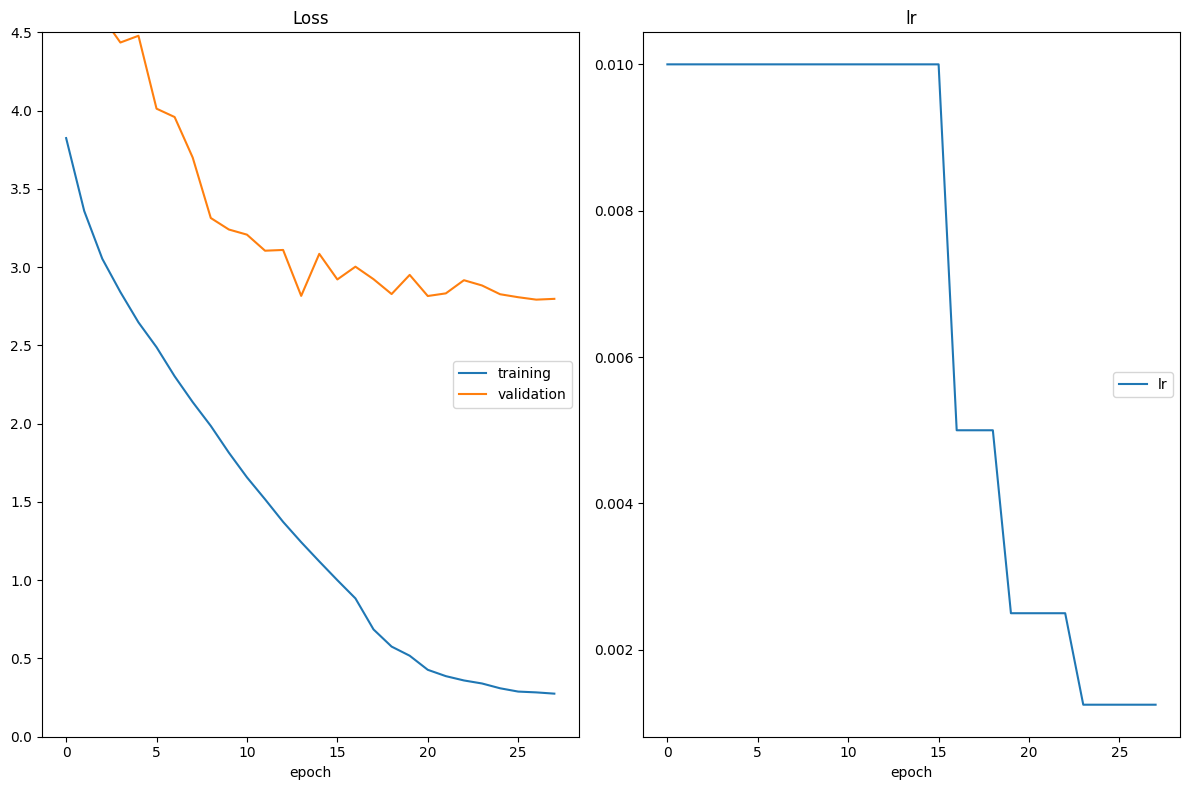

Epoch: 29 	Training Loss: 0.261519 	Validation Loss: 2.828684
No improvement for 15 epochs.
Early stopping triggered after 15 epochs of no improvement.


In [10]:
model = MyEnhancedModel(num_classes=num_classes, dropout=dropout)
learning_rate = 0.01

dropout = 0.5  # dropout for our model
weight_decay = 0.01  # regularization. Increase this to combat overfitting
num_epochs = 50


optimizer = get_optimizer(
    model,
    optimizer=opt,
    learning_rate=learning_rate,
    weight_decay=weight_decay,
    momentum=momentum,
)

optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/best_val_loss_enhanced.pt",
    interactive_tracking=True,
    early_stopping_patience=15,
)

In [11]:
model = MyEnhancedModel(num_classes=num_classes, dropout=dropout)

# Load the weights from the checkpoint
model.load_state_dict(
    torch.load("checkpoints/best_val_loss_enhanced.pt", weights_only=True)
)
model = model.to(device)

# Run test
one_epoch_test(data_loaders["test"], model, loss)

Test Loss: 2.769658
Test Accuracy: 30.24%


2.7696580600738527

## Improvement Attempt

Training original model from scratch since it performed the best so far with original hyperparameters and less validation size

In [15]:
batch_size = 64  # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.1  # fraction of the training data to reserve for validation
num_epochs = 50  # number of epochs for training
num_classes = 50  # number of classes. Do not change this
dropout = 0.5  # dropout for our model
learning_rate = 0.01  # Learning rate for SGD (or Adam)
opt = "sgd"  # optimizer. 'sgd' or 'adam'
weight_decay = 0.01  # regularization. Increase this to combat overfitting
momentum = 0.9

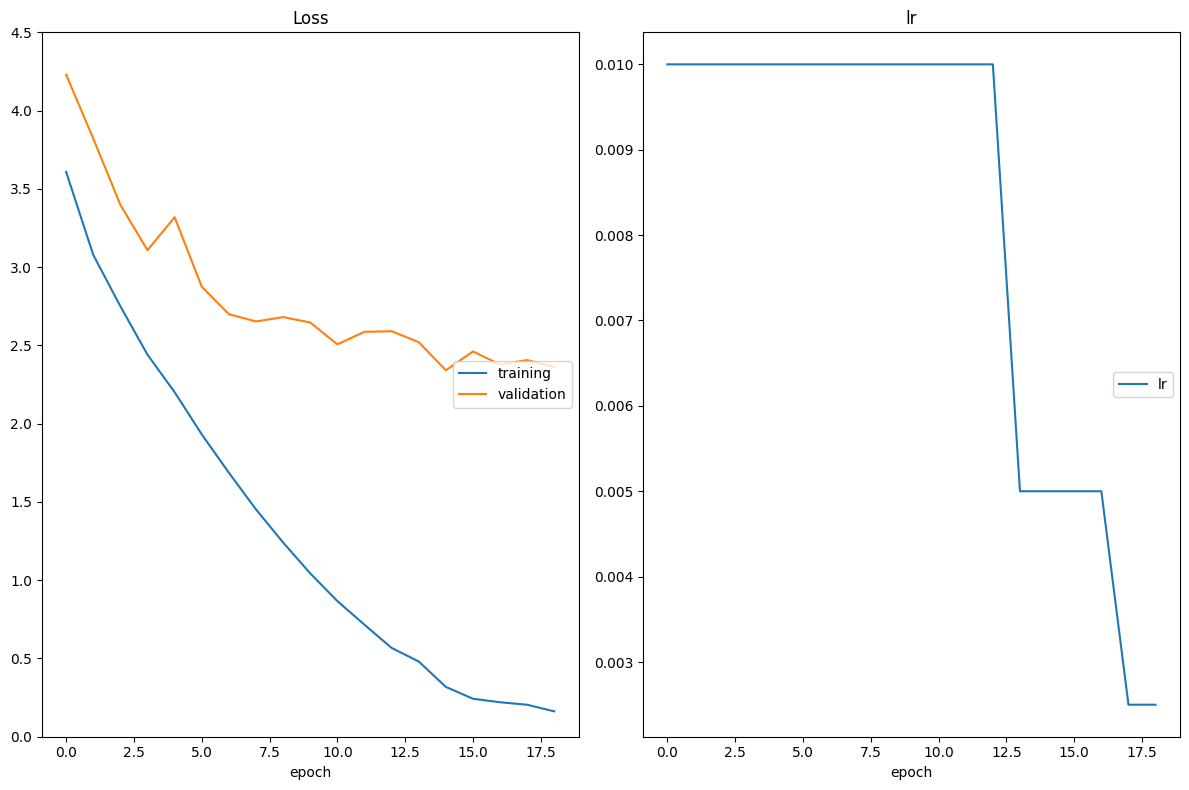

Epoch: 20 	Training Loss: 0.145709 	Validation Loss: 2.361357
No improvement for 5 epochs.
Early stopping triggered after 5 epochs of no improvement.


In [18]:
# Set up data loaders using batch_size and valid_size defined above
data_loaders = get_data_loaders(batch_size=batch_size, valid_size=valid_size)

# Instantiate model with num_classes and dropout
model = MyModel(num_classes=num_classes, dropout=dropout)

# Get the optimizer with the specified model, learning rate, optimizer type, and weight decay
optimizer = get_optimizer(
    model,
    optimizer=opt,
    learning_rate=learning_rate,
    weight_decay=weight_decay,
    momentum=momentum,
)

# Get the loss function
loss = get_loss()

# Run the optimization process
optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/best_val_loss.pt",
    interactive_tracking=True,
)

In [19]:
# Run test
one_epoch_test(data_loaders["test"], model, loss)

Test Loss: 2.362092
Test Accuracy: 41.92%


2.3620919101715088

## Visualizing the gradients

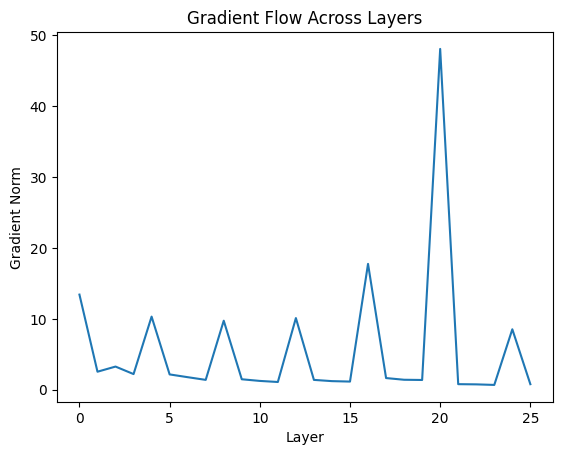

In [42]:
import matplotlib.pyplot as plt
import torch

# Ensure the model is loaded on the same device as the data
from utils.device import get_device

device = get_device()
model = MyModel(num_classes=num_classes, dropout=dropout)
model.load_state_dict(
    torch.load("checkpoints/best_val_loss_enhanced.pt", weights_only=True)
)
model.to(device)  # Move model to device

# Select a batch of data and move it to the same device
inputs, labels = next(iter(data_loader))
inputs, labels = inputs.to(device), labels.to(device)

# Set the model to evaluation mode
model.eval()

# Forward pass
outputs = model(inputs)

criterion = get_loss()
loss = criterion(outputs, labels)

# Backward pass to compute gradients
model.zero_grad()  # Clear any existing gradients
loss.backward()  # Compute gradients

# Collect gradients for each layer
layer_grads = []
for param in model.parameters():
    if param.requires_grad and param.grad is not None:
        layer_grads.append(param.grad.norm().item())

# Plot gradient norms
plt.plot(layer_grads)
plt.xlabel("Layer")
plt.ylabel("Gradient Norm")
plt.title("Gradient Flow Across Layers")
plt.show()

The gradient flow plot you’ve generated does not show a clear case of vanishing gradients, but it does suggest that the gradients might be inconsistent across layers, with some layers having very low gradient norms

# Improvement

**Updates**

1.	Label Smoothing with Cross-Entropy Loss: We use label smoothing (label_smoothing=0.1) to make our model less confident about its predictions. Label smoothing replaces the hard 0 and 1 labels with softer labels (e.g., 0.9 and 0.1). This helps reduce overfitting by preventing the model from becoming overly confident and potentially improves generalization, especially when classes might overlap or be ambiguous.
2.	Xavier Initialization for Weights: Proper weight initialization is critical in deep networks to avoid issues like vanishing or exploding gradients. Here, we initialize the weights of convolutional and linear layers using Xavier (Glorot) initialization. This initialization method scales the weights to maintain a balance in the variance of activations across layers, promoting stable gradient flow during backpropagation.
3.	Gradient Clipping: The gradient flow plot above shows some layers with significantly larger gradient norms compared to others, which can destabilize training. To address this, we apply gradient clipping to cap the maximum gradient norm. This ensures that gradients don’t become excessively large, thereby reducing the risk of gradient explosion and stabilizing the update steps. Gradient clipping should help the model learn more efficiently and prevent excessive weight updates that could cause the model to diverge.

**Expected Outcome**

By combining label smoothing, proper weight initialization, and gradient clipping, we aim to:

-	Improve generalization, leading to better test accuracy.
-	Stabilize training by maintaining consistent gradient magnitudes across layers.
-	Mitigate the risk of vanishing or exploding gradients, allowing the model to learn effectively over deeper layers.

In [15]:
batch_size = 64  # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.1  # fraction of the training data to reserve for validation
num_epochs = 50  # number of epochs for training
num_classes = 50  # number of classes. Do not change this
dropout = 0.5  # dropout for our model
learning_rate = 0.01  # Learning rate for SGD (or Adam)
opt = "sgd"  # optimizer. 'sgd' or 'adam'
weight_decay = 0.01  # regularization. Increase this to combat overfitting
momentum = 0.9
label_smoothing = 0.1
clip_value = 1.0
save_path = "checkpoints/best_val_loss_2.pt"

In [12]:
from cnn.landmark_classification.src.data import get_data_loaders
from cnn.landmark_classification.src.train import optimize, one_epoch_test
from cnn.landmark_classification.src.optimizer import get_optimizer, get_loss
from cnn.landmark_classification.src.model import MyModel
from model.helper import initialize_weights

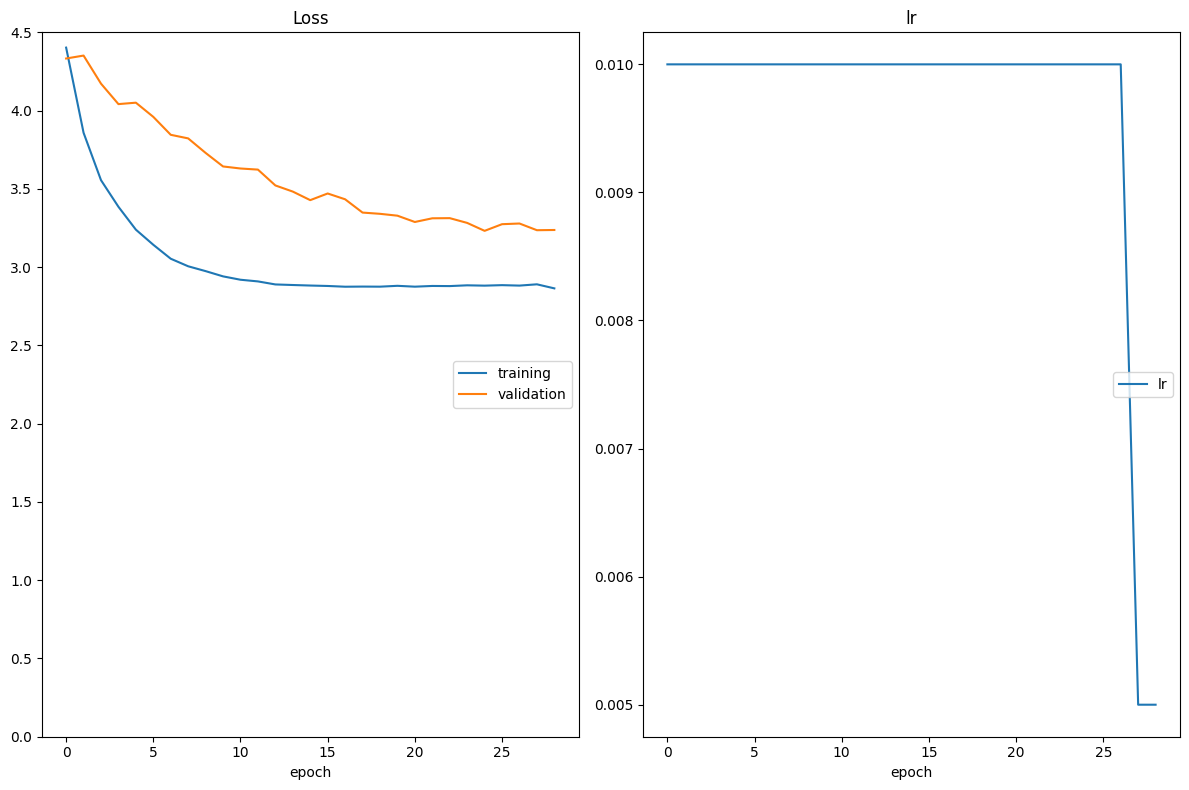

Epoch: 30 	Training Loss: 2.838153 	Validation Loss: 3.219181
No improvement for 5 epochs.
Early stopping triggered after 5 epochs of no improvement.


In [14]:
# Set up data loaders using batch_size and valid_size defined above
data_loaders = get_data_loaders(batch_size=batch_size, valid_size=valid_size)

# Instantiate model with num_classes and dropout
model = MyModel(num_classes=num_classes, dropout=dropout)
model.apply(initialize_weights)

# Get the optimizer with the specified model, learning rate, optimizer type, and weight decay
optimizer = get_optimizer(
    model,
    optimizer=opt,
    learning_rate=learning_rate,
    weight_decay=weight_decay,
    momentum=momentum,
)

# Get the loss function
loss = get_loss(label_smoothing=label_smoothing)

# Run the optimization process
optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path=save_path,
    interactive_tracking=True,
    clip_value=clip_value,
)

In [16]:
# Run test
one_epoch_test(data_loaders["test"], model, loss)

Test Loss: 3.210339
Test Accuracy: 36.88%


3.21033934135437

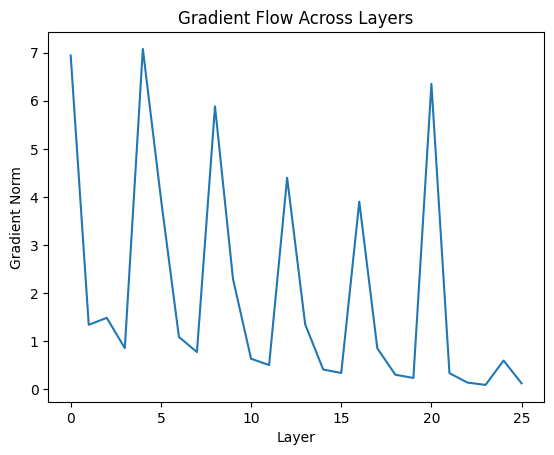

In [18]:
import matplotlib.pyplot as plt
import torch

# Ensure the model is loaded on the same device as the data
from utils.device import get_device

device = get_device()
model = MyModel(num_classes=num_classes, dropout=dropout)
model.load_state_dict(torch.load(save_path, weights_only=True))
model.to(device)  # Move model to device

# Select a batch of data and move it to the same device
inputs, labels = next(iter(data_loaders["train"]))
inputs, labels = inputs.to(device), labels.to(device)

# Set the model to evaluation mode
model.eval()

# Forward pass
outputs = model(inputs)

criterion = get_loss()
loss = criterion(outputs, labels)

# Backward pass to compute gradients
model.zero_grad()  # Clear any existing gradients
loss.backward()  # Compute gradients

# Collect gradients for each layer
layer_grads = []
for param in model.parameters():
    if param.requires_grad and param.grad is not None:
        layer_grads.append(param.grad.norm().item())

# Plot gradient norms
plt.plot(layer_grads)
plt.xlabel("Layer")
plt.ylabel("Gradient Norm")
plt.title("Gradient Flow Across Layers")
plt.show()

Training the model further with few more epochs and more patience for early stopping

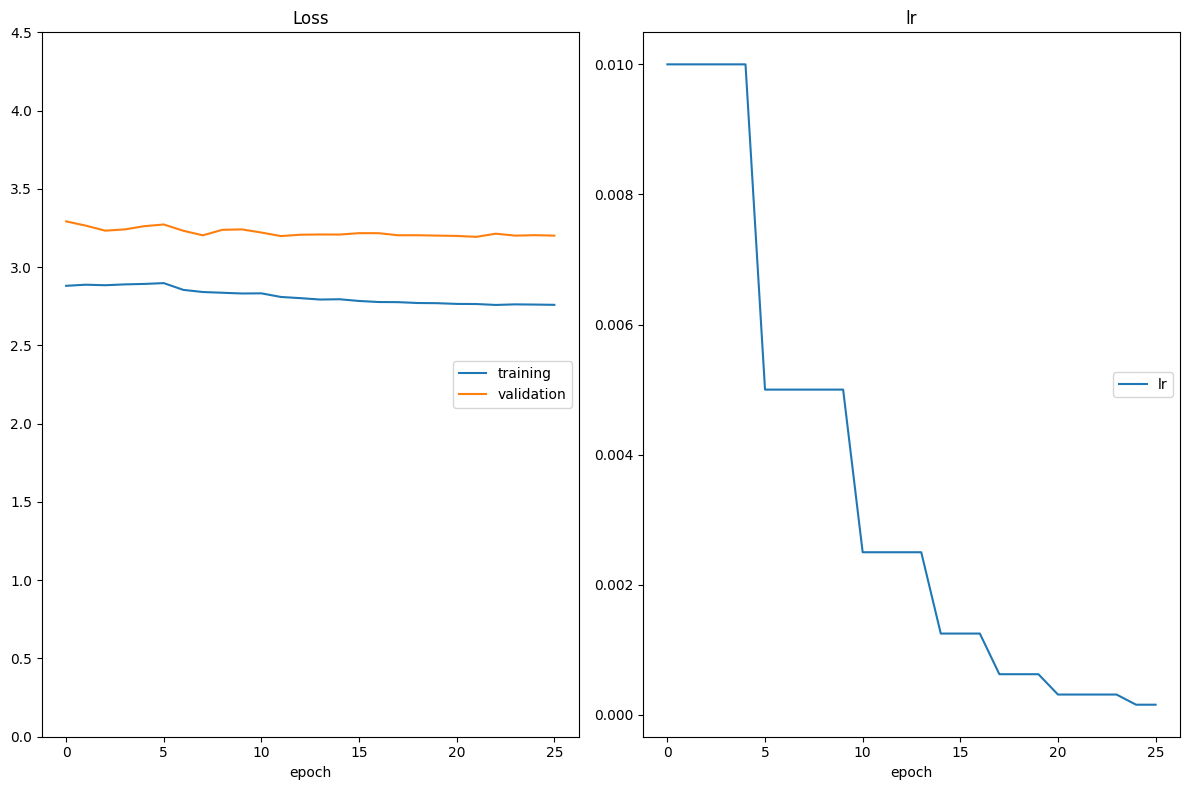

Epoch: 27 	Training Loss: 2.756271 	Validation Loss: 3.199244
No improvement for 15 epochs.
Early stopping triggered after 15 epochs of no improvement.


In [23]:
early_stopping_patience = 15

model = MyModel(num_classes=num_classes, dropout=dropout)
model.load_state_dict(torch.load(save_path, weights_only=True))
model.to(device)

optimizer = get_optimizer(
    model,
    optimizer=opt,
    learning_rate=learning_rate,
    weight_decay=weight_decay,
    momentum=momentum,
)

# Get the loss function
loss = get_loss(label_smoothing=label_smoothing)

optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path=save_path,
    interactive_tracking=True,
    early_stopping_patience=early_stopping_patience,
    clip_value=clip_value,
)

In [24]:
# Run test
one_epoch_test(data_loaders["test"], model, loss)

Test Loss: 3.184530
Test Accuracy: 42.08%


3.18453045501709

# Adam

In [5]:
batch_size = 64  # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.1  # fraction of the training data to reserve for validation
num_epochs = 20  # number of epochs for training
num_classes = 50  # number of classes. Do not change this
dropout = 0.5  # dropout for our model
learning_rate = 0.01  # Learning rate for SGD (or Adam)
opt = "adam"  # optimizer. 'sgd' or 'adam'
weight_decay = 0.001  # regularization. Increase this to combat overfitting
betas = (0.9, 0.999)
label_smoothing = 0.1
clip_value = 1.0
save_path = "checkpoints/best_val_loss_3.pt"
early_stopping_patience = 15

In [6]:
from cnn.landmark_classification.src.data import get_data_loaders
from cnn.landmark_classification.src.train import optimize, one_epoch_test
from cnn.landmark_classification.src.optimizer import get_optimizer, get_loss
from cnn.landmark_classification.src.model import MyModel
from model.helper import initialize_weights

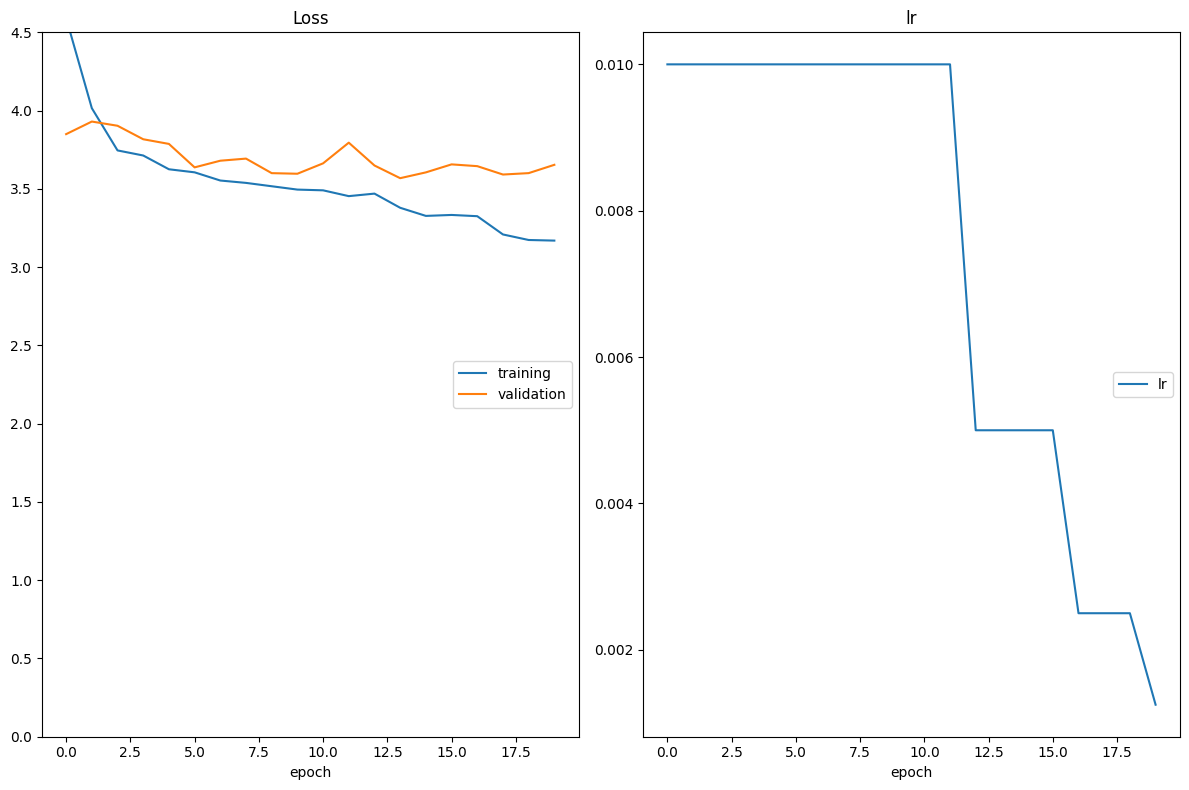

In [7]:
# Set up data loaders using batch_size and valid_size defined above
data_loaders = get_data_loaders(batch_size=batch_size, valid_size=valid_size)

# Instantiate model with num_classes and dropout
model = MyModel(num_classes=num_classes, dropout=dropout)
model.apply(initialize_weights)

# Get the optimizer with the specified model, learning rate, optimizer type, and weight decay
optimizer = get_optimizer(
    model,
    optimizer=opt,
    learning_rate=learning_rate,
    weight_decay=weight_decay,
    betas=betas,
)

# Get the loss function
loss = get_loss(label_smoothing=label_smoothing)

# Run the optimization process
optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path=save_path,
    interactive_tracking=True,
    early_stopping_patience=early_stopping_patience,
    clip_value=clip_value,
)

In [8]:
# Run test
one_epoch_test(data_loaders["test"], model, loss)

Test Loss: 3.639303
Test Accuracy: 10.00%


3.639302561187744

# Leaky Relu with SGD

In [2]:
batch_size = 64  # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2  # fraction of the training data to reserve for validation
num_epochs = 50  # number of epochs for training
num_classes = 50  # number of classes. Do not change this
dropout = 0.5  # dropout for our model
learning_rate = 0.01  # Learning rate for SGD (or Adam)
opt = "sgd"  # optimizer. 'sgd' or 'adam'
weight_decay = 0.01  # regularization. Increase this to combat overfitting
momentum = 0.9
label_smoothing = 0.1
negative_slope = 0.01
clip_value = 1.0
save_path = "checkpoints/best_val_loss_leaky.pt"
early_stopping_patience = 15

In [3]:
from cnn.landmark_classification.src.data import get_data_loaders
from cnn.landmark_classification.src.train import optimize, one_epoch_test
from cnn.landmark_classification.src.optimizer import get_optimizer, get_loss
from cnn.landmark_classification.src.model import MyLeakyModel
from model.helper import initialize_weights

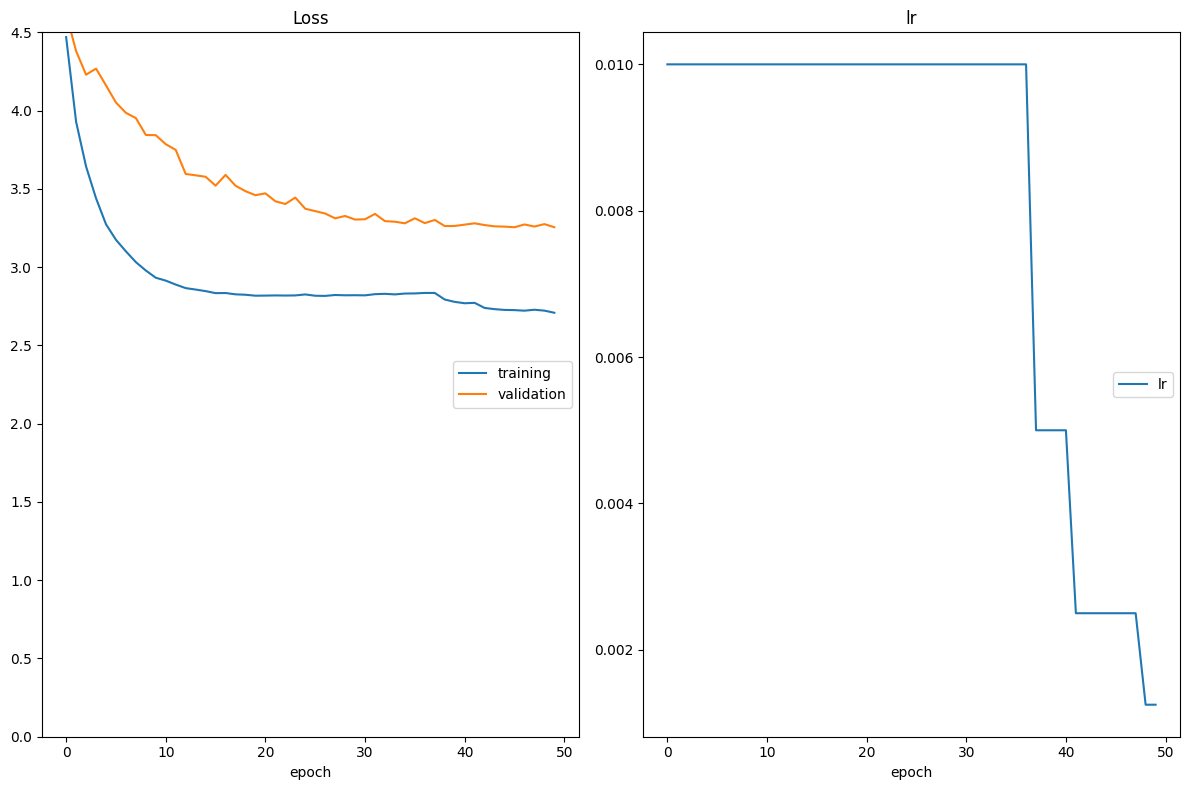

In [4]:
# Set up data loaders using batch_size and valid_size defined above
data_loaders = get_data_loaders(batch_size=batch_size, valid_size=valid_size)

# Instantiate model with num_classes, dropout and negative slope
model = MyLeakyModel(
    num_classes=num_classes, dropout=dropout, negative_slope=negative_slope
)
model.apply(initialize_weights)

# Get the optimizer with the specified model, learning rate, optimizer type, and weight decay
optimizer = get_optimizer(
    model,
    optimizer=opt,
    learning_rate=learning_rate,
    weight_decay=weight_decay,
    momentum=momentum,
)

# Get the loss function
loss = get_loss(label_smoothing=label_smoothing)

# Run the optimization process
optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path=save_path,
    interactive_tracking=True,
    early_stopping_patience=early_stopping_patience,
    clip_value=clip_value,
)

In [5]:
# Run test
one_epoch_test(data_loaders["test"], model, loss)

Test Loss: 3.201362
Test Accuracy: 42.16%


3.20136247215271

# Deeper Leaky Relu with Adam

**Updates**

- Deeper model with another group of convolution layer
- Lower Learning Rate (0.001): This allows the model to learn more gradually, which can help prevent overshooting in the optimization process.
- Switch to Adam Optimizer: Adam often improves convergence by adjusting learning rates per parameter, especially helpful for complex architectures.
- Higher Dropout Rate: Prevents overfitting by adding regularization; 0.4 is often a good balance for moderately deep networks.
- Reduced Weight Decay (0.0005): Decreased weight decay allows the model more freedom to adjust weights, which might help learn better on the training data.
- Gradient Clipping (0.5): Further restricts gradients to control sudden large updates that can destabilize training.

In [2]:
batch_size = 128  # Higher batch size can help stabilize gradients, but requires more memory
valid_size = 0.15  # 15% for validation
num_epochs = 100  # Start with a smaller number to avoid long training times
num_classes = 50  # Number of classes, unchanged
dropout = 0.4  # Increase dropout to reduce overfitting, but not too high
learning_rate = 0.001  # Lower learning rate for gradual learning
opt = "adam"  # Switching to Adam for adaptive learning rates
weight_decay = 0.0005  # Smaller regularization factor to reduce constraint on weights
label_smoothing = 0.1  # Same as before to handle label noise
negative_slope = 0.01  # LeakyReLU slope, unchanged
clip_value = 0.5  # Lower clip value to prevent large gradient updates
save_path = "checkpoints/best_val_loss_leaky_deeper_adam.pt"
early_stopping_patience = 15  # Allow some epochs for potential improvement

In [3]:
from cnn.landmark_classification.src.data import get_data_loaders
from cnn.landmark_classification.src.train import optimize, one_epoch_test
from cnn.landmark_classification.src.optimizer import get_optimizer, get_loss
from cnn.landmark_classification.src.model import MyLeakyDeeperModel
from model.helper import initialize_weights

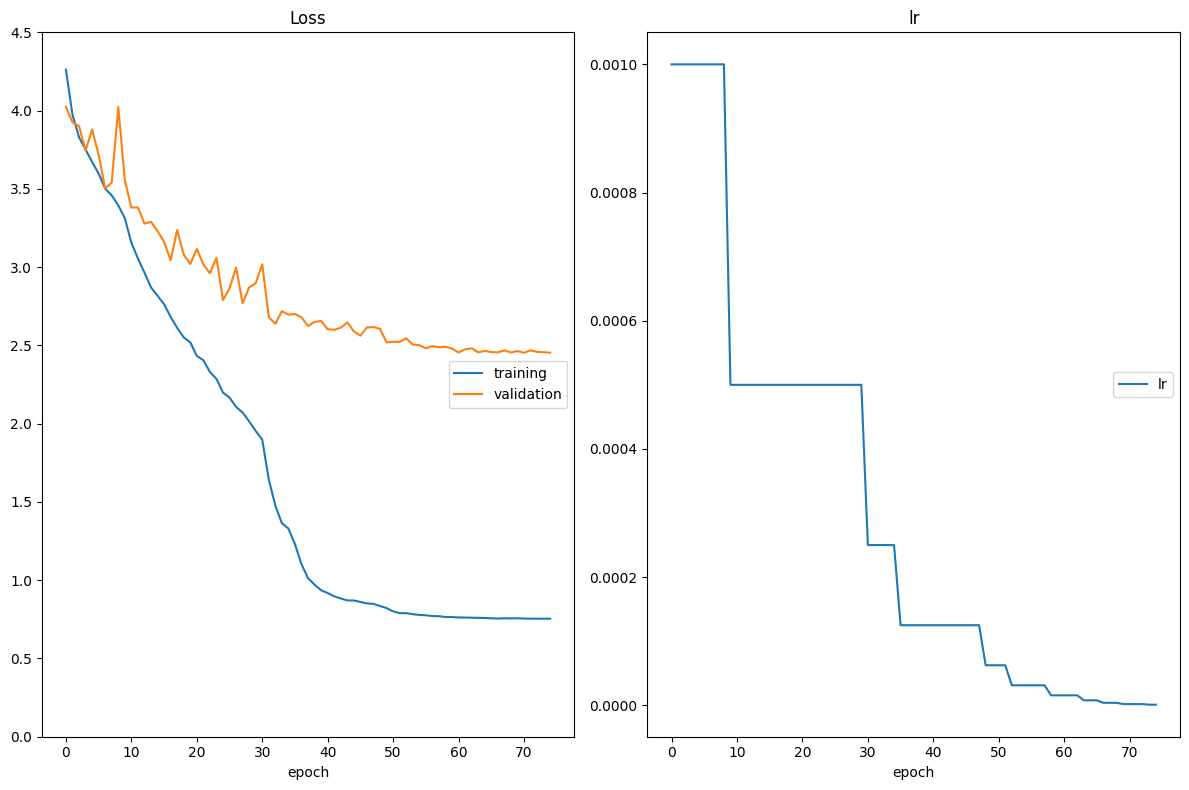

Epoch: 76 	Training Loss: 0.752781 	Validation Loss: 2.458059
No improvement for 15 epochs.
Early stopping triggered after 15 epochs of no improvement.


In [4]:
# Set up data loaders using batch_size and valid_size defined above
data_loaders = get_data_loaders(batch_size=batch_size, valid_size=valid_size)

# Instantiate model with num_classes, dropout and negative slope
model = MyLeakyDeeperModel(
    num_classes=num_classes, dropout=dropout, negative_slope=negative_slope
)
model.apply(initialize_weights)

# Get the optimizer with the specified model, learning rate, optimizer type, and weight decay
optimizer = get_optimizer(
    model,
    optimizer=opt,
    learning_rate=learning_rate,
    weight_decay=weight_decay,
)

# Get the loss function
loss = get_loss(label_smoothing=label_smoothing)

# Run the optimization process
optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path=save_path,
    interactive_tracking=True,
    early_stopping_patience=early_stopping_patience,
    clip_value=clip_value,
)

In [5]:
# Run test
one_epoch_test(data_loaders["test"], model, loss)

Test Loss: 2.290144
Test Accuracy: 52.72%


2.290143793487549

# Torch Script

In [6]:
# NOTE: you might need to restart the notebook before running this step
# If you get an error about RuntimeError: Can't redefine method: forward on class
# restart your notebook then execute only this cell
from cnn.landmark_classification.src.predictor import Predictor
from data.helper import calculate_mean_std
from cnn.landmark_classification.src.model import MyLeakyDeeperModel
from cnn.landmark_classification.src.data import get_data_loaders
import torch

save_path = "checkpoints/best_val_loss_leaky_deeper_adam.pt"

data_loaders = get_data_loaders(batch_size=1)

# First let's get the class names from our data loaders
class_names = data_loaders["train"].dataset.dataset.classes

# Then let's move the model_transfer to the CPU
# (we don't need GPU for inference)
model = MyLeakyDeeperModel(num_classes=50, dropout=0.4).cpu()

# Let's make sure we use the right weights by loading the
# best weights we have found during training
# NOTE: remember to use map_location='cpu' so the weights
# are loaded on the CPU (and not the GPU)

model.load_state_dict(
    torch.load(save_path, map_location="cpu", weights_only=True)
)

# Let's wrap our model using the predictor class
mean, std = calculate_mean_std(data_loaders["train"].dataset.dataset)
predictor = Predictor(model, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor = torch.jit.script(predictor)

scripted_predictor.save("checkpoints/original_exported.pt")

Loading mean and std from cache: mean_and_std.pt.local
Dataset mean: tensor([0.4675, 0.4715, 0.4643]), std: tensor([0.2185, 0.2184, 0.2382])
Training set size: 3996, Validation set size: 1000, Test set size: 1250
Loading mean and std from cache: mean_and_std.pt.local


Now let's make sure the exported model has the same performance as the original one, by reloading it and testing it. The Predictor class takes different inputs than the non-wrapped model, so we have to use a specific test loop:

In [7]:
import torch

# Load the scripted model from the file
model_reloaded = torch.jit.load("checkpoints/original_exported.pt")

In [8]:
from cnn.landmark_classification.src.predictor import predictor_test

pred, truth = predictor_test(data_loaders["test"], model_reloaded)

100%|███████████████████████████████████████| 1250/1250 [00:20<00:00, 60.56it/s]

Accuracy: 0.5224


Finally, let's have a look at the confusion matrix of the model we are going to use in production:

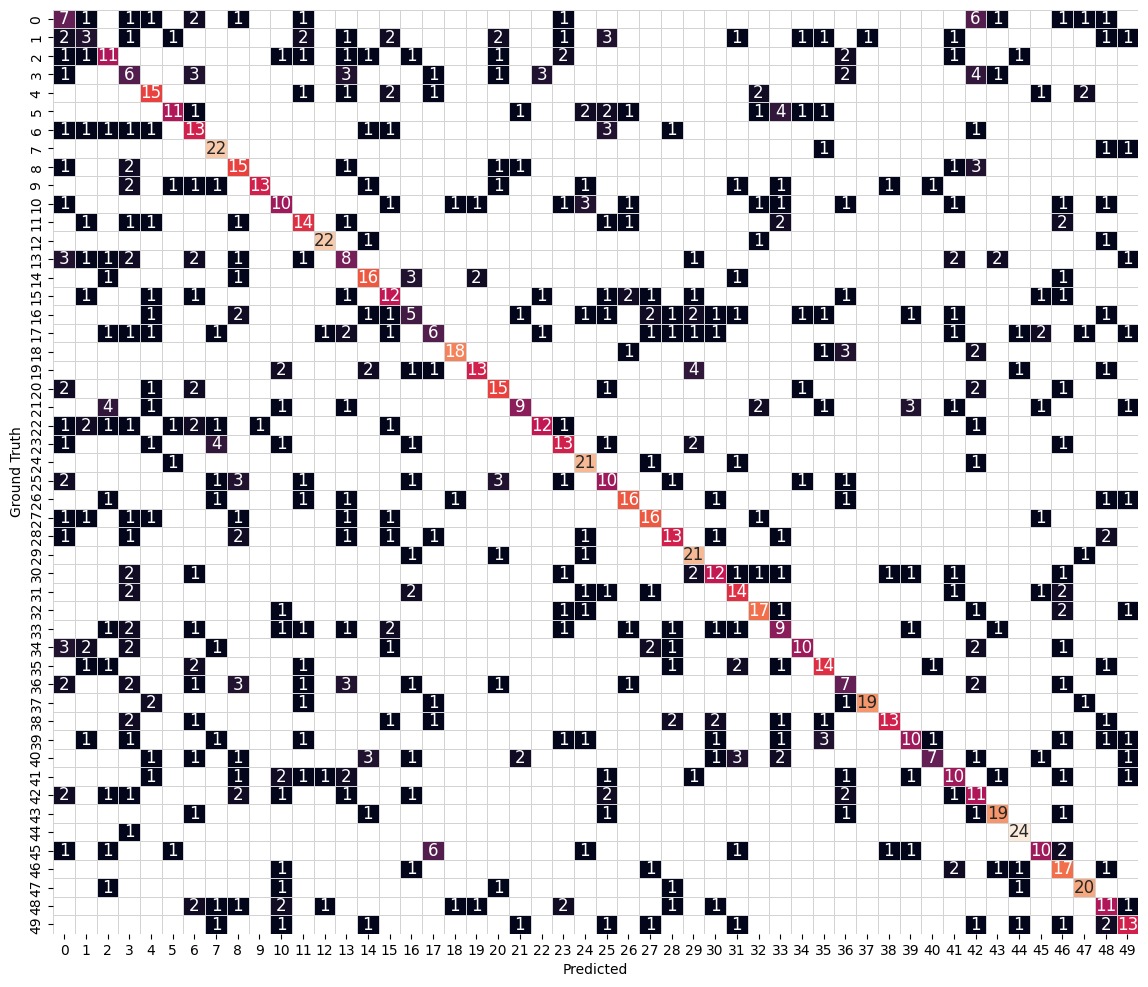

In [9]:
from cnn.landmark_classification.src.helpers import plot_confusion_matrix

plot_confusion_matrix(pred, truth)